In [2]:
#imports
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from collections import Counter

plt.style.use("default")


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
DATASET_PATH = "/content/drive/MyDrive/Dataset "

CLASSES = ["SkinCancer", "chickenpox", "monkeypox", "Ak"]


In [5]:
class_counts = {}

for cls in CLASSES:
    class_path = os.path.join(DATASET_PATH, cls)
    class_counts[cls] = len(os.listdir(class_path))

class_counts


{'SkinCancer': 771, 'chickenpox': 514, 'monkeypox': 387, 'Ak': 832}

In [6]:
import zipfile

for cls in CLASSES:
    class_path = os.path.join(DATASET_PATH, cls)
    for file_name in os.listdir(class_path):
        if file_name.endswith(".zip"):
            zip_path = os.path.join(class_path, file_name)
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(class_path)
            print(f"Extracted {file_name} in {cls}")


Extracted SkinCancer_merged.zip in SkinCancer
Extracted ch_Chickenpox_Varicela.zip in chickenpox
Extracted mk_Monkeypox.zip in monkeypox
Extracted Actinic_kertosis_merged.zip in Ak


In [7]:
class_counts = {}

for cls in CLASSES:
    class_path = os.path.join(DATASET_PATH, cls)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    class_counts[cls] = len(images)

class_counts


{'SkinCancer': 770, 'chickenpox': 513, 'monkeypox': 386, 'Ak': 831}

In [8]:
total_images = sum(class_counts.values())
print(f"Total number of images in 4 classes: {total_images}")


Total number of images in 4 classes: 2500


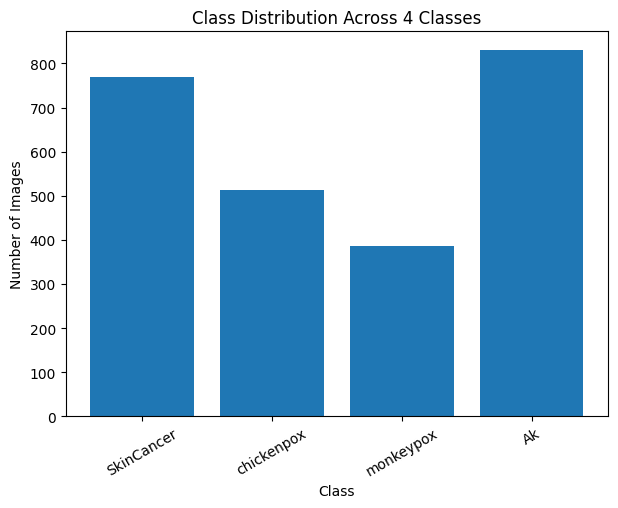

In [9]:
plt.figure(figsize=(7,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution Across 4 Classes")
plt.xticks(rotation=30)
plt.show()


In [10]:
widths = []
heights = []

for cls in CLASSES:
    class_path = os.path.join(DATASET_PATH, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path)
            w, h = img.size
            widths.append(w)
            heights.append(h)
        except:
            pass


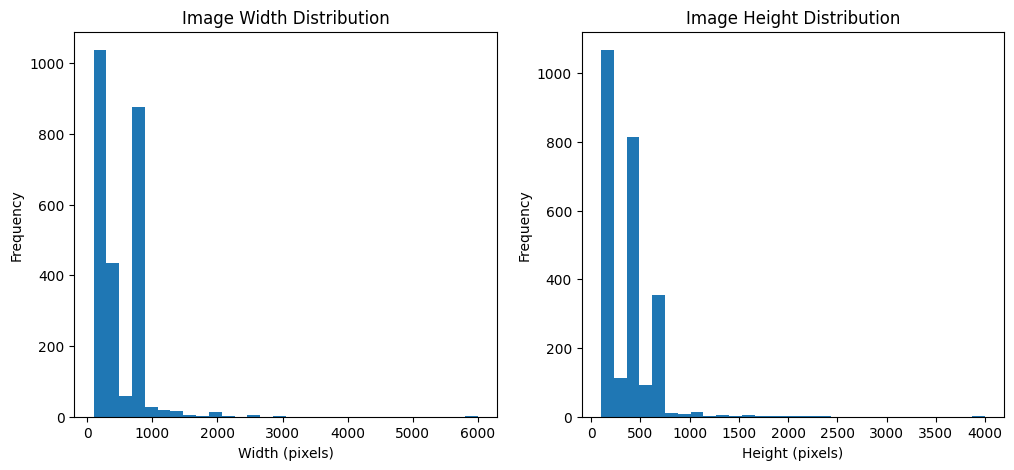

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(widths, bins=30)
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")
plt.title("Image Width Distribution")

plt.subplot(1,2,2)
plt.hist(heights, bins=30)
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")
plt.title("Image Height Distribution")

plt.show()


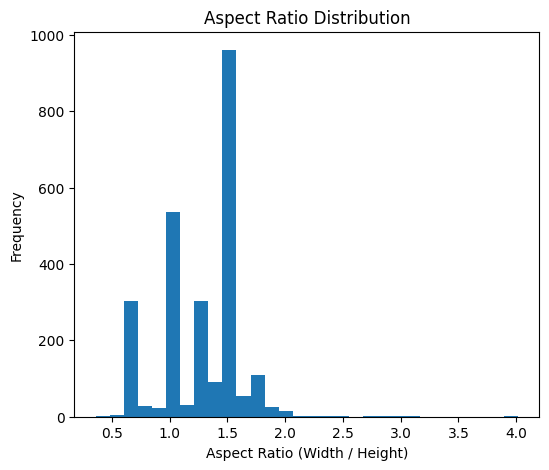

In [12]:
aspect_ratios = np.array(widths) / np.array(heights)

plt.figure(figsize=(6,5))
plt.hist(aspect_ratios, bins=30)
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.title("Aspect Ratio Distribution")
plt.show()


In [13]:
total_pixels = 0
sum_pixels = 0
sum_sq_pixels = 0
min_pixel = 255
max_pixel = 0

for cls in CLASSES:
    class_path = os.path.join(DATASET_PATH, cls)
    for img_name in os.listdir(class_path):
        if img_name.lower().endswith(('.jpg','.jpeg','.png')):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img.astype(np.float32)

            # Update min/max
            min_pixel = min(min_pixel, img.min())
            max_pixel = max(max_pixel, img.max())

            # Update sum and sum of squares
            sum_pixels += img.sum()
            sum_sq_pixels += np.square(img).sum()

            # Count total pixels
            total_pixels += img.size

# Compute mean and std
mean_pixel = sum_pixels / total_pixels
std_pixel = np.sqrt((sum_sq_pixels / total_pixels) - (mean_pixel**2))

print("Global Pixel Statistics (Incremental)")
print(f"Minimum pixel value: {min_pixel}")
print(f"Maximum pixel value: {max_pixel}")
print(f"Mean pixel value: {mean_pixel:.2f}")
print(f"Standard deviation: {std_pixel:.2f}")



Global Pixel Statistics (Incremental)
Minimum pixel value: 0.0
Maximum pixel value: 255.0
Mean pixel value: 128.25
Standard deviation: 58.62


Class wise EDA






In [14]:
#Image Count per Class
class_counts = {}

for cls in CLASSES:
    class_path = os.path.join(DATASET_PATH, cls)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    class_counts[cls] = len(images)

print("Number of images per class:")
print(class_counts)


Number of images per class:
{'SkinCancer': 770, 'chickenpox': 513, 'monkeypox': 386, 'Ak': 831}


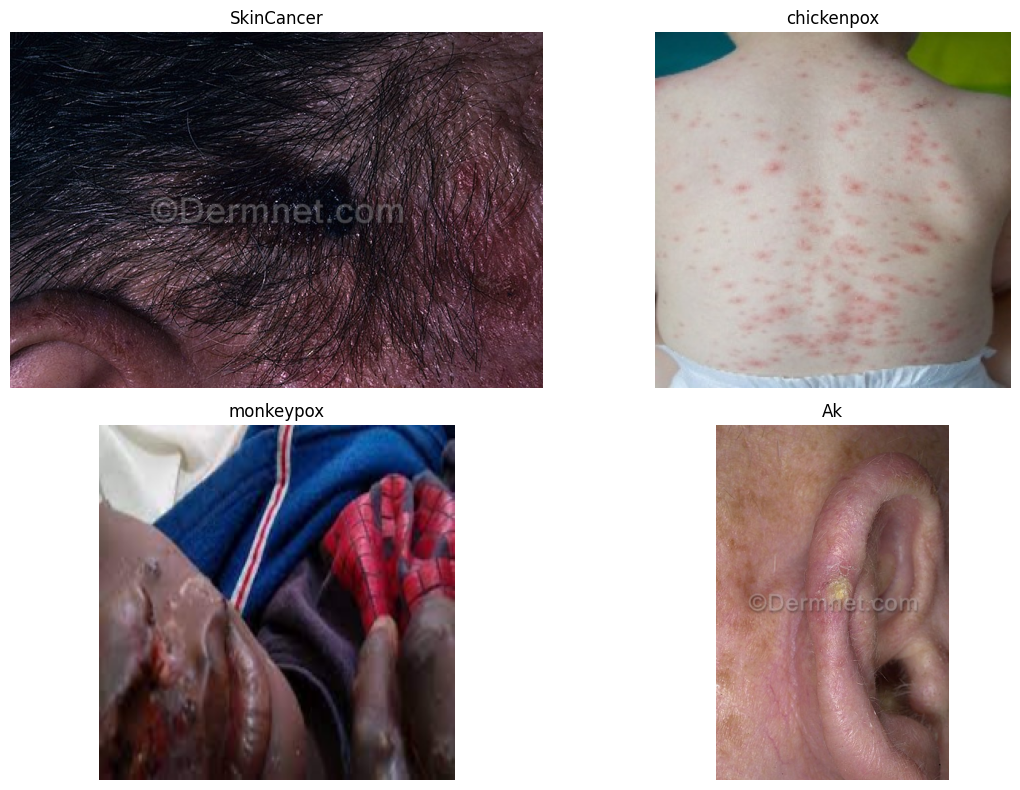

In [15]:
#Display Random Sample Images Per Class
plt.figure(figsize=(12,8))
for i, cls in enumerate(CLASSES):
    class_path = os.path.join(DATASET_PATH, cls)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    sample_img = random.choice(images)
    img = Image.open(os.path.join(class_path, sample_img))

    plt.subplot(2,2,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
plt.tight_layout()
plt.show()



Class: SkinCancer
Min width: 451, Max width: 720, Mean width: 657.73
Min height: 439, Max height: 720, Mean height: 545.26
Aspect ratio: Min 0.63, Max 1.64, Mean 1.28


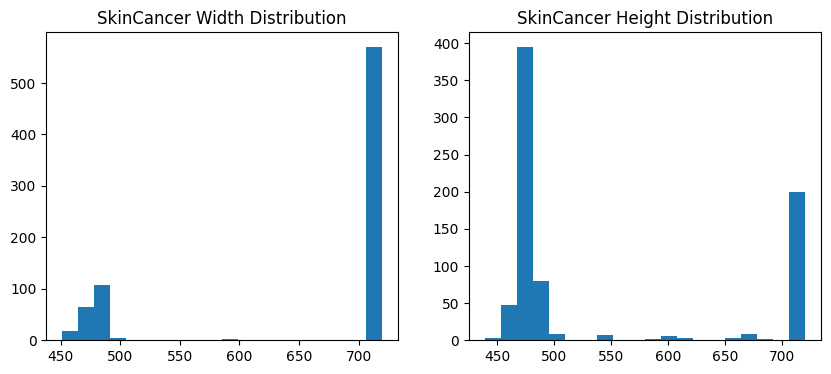


Class: chickenpox
Min width: 100, Max width: 6000, Mean width: 364.62
Min height: 100, Max height: 4000, Mean height: 305.43
Aspect ratio: Min 0.56, Max 4.02, Mean 1.20


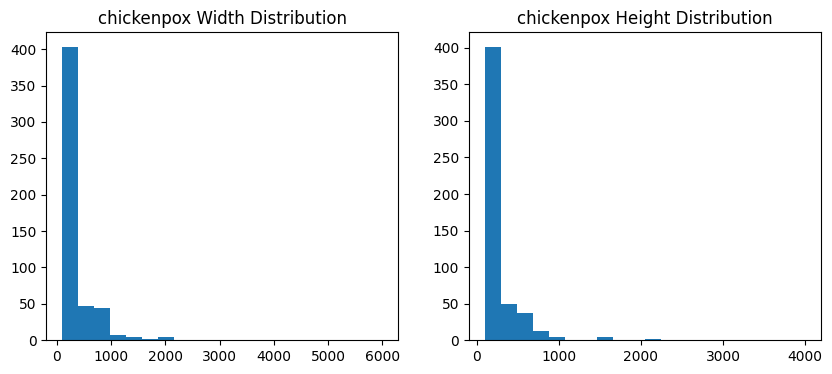


Class: monkeypox
Min width: 224, Max width: 3000, Mean width: 442.46
Min height: 151, Max height: 2427, Mean height: 334.13
Aspect ratio: Min 0.74, Max 2.21, Mean 1.28


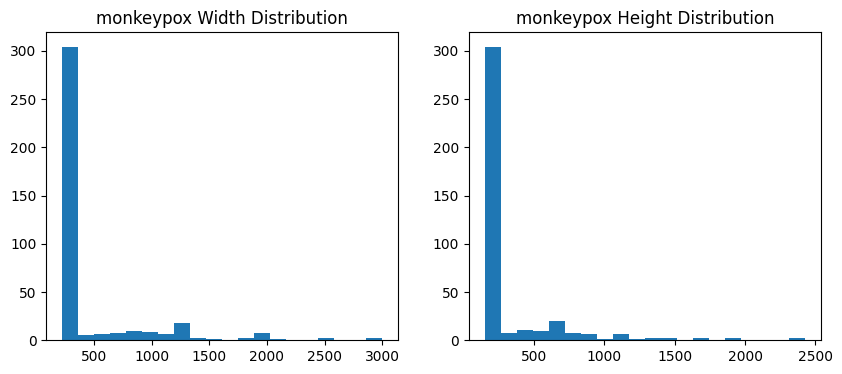


Class: Ak
Min width: 100, Max width: 2560, Mean width: 460.08
Min height: 100, Max height: 1707, Mean height: 363.79
Aspect ratio: Min 0.36, Max 3.02, Mean 1.33


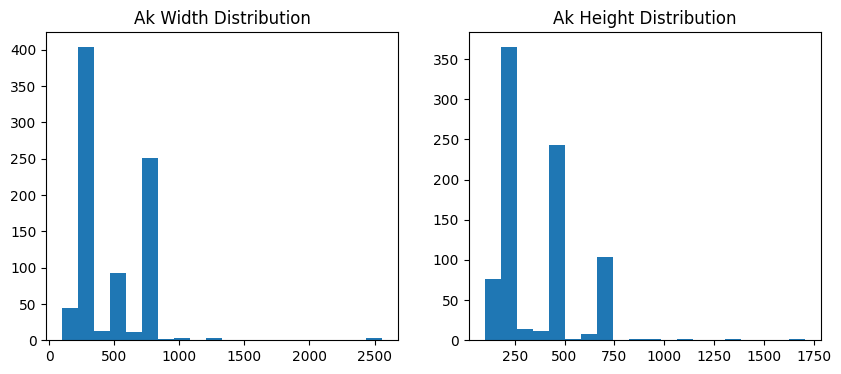

In [16]:
#Image Size & Aspect Ratio Analysis Per Class
for cls in CLASSES:
    widths, heights = [], []
    class_path = os.path.join(DATASET_PATH, cls)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img_name in images:
        img = Image.open(os.path.join(class_path, img_name))
        w, h = img.size
        widths.append(w)
        heights.append(h)

    aspect_ratios = np.array(widths) / np.array(heights)

    print(f"\nClass: {cls}")
    print(f"Min width: {min(widths)}, Max width: {max(widths)}, Mean width: {np.mean(widths):.2f}")
    print(f"Min height: {min(heights)}, Max height: {max(heights)}, Mean height: {np.mean(heights):.2f}")
    print(f"Aspect ratio: Min {aspect_ratios.min():.2f}, Max {aspect_ratios.max():.2f}, Mean {aspect_ratios.mean():.2f}")

    # Plot histograms
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(widths, bins=20)
    plt.title(f"{cls} Width Distribution")
    plt.subplot(1,2,2)
    plt.hist(heights, bins=20)
    plt.title(f"{cls} Height Distribution")
    plt.show()


In [17]:
for cls in CLASSES:
    class_path = os.path.join(DATASET_PATH, cls)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg','.jpeg','.png'))]

    total_pixels = 0
    sum_pixels = 0
    sum_sq_pixels = 0
    min_pixel = 255
    max_pixel = 0

    for img_name in images:
        img = cv2.imread(os.path.join(class_path, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)

        min_pixel = min(min_pixel, img.min())
        max_pixel = max(max_pixel, img.max())
        sum_pixels += img.sum()
        sum_sq_pixels += np.square(img).sum()
        total_pixels += img.size

    mean_pixel = sum_pixels / total_pixels
    std_pixel = np.sqrt((sum_sq_pixels / total_pixels) - (mean_pixel**2))

    print(f"\nClass: {cls} Pixel Stats")
    print(f"Min: {min_pixel}, Max: {max_pixel}, Mean: {mean_pixel:.2f}, Std: {std_pixel:.2f}")



Class: SkinCancer Pixel Stats
Min: 0.0, Max: 255.0, Mean: 123.60, Std: 55.04

Class: chickenpox Pixel Stats
Min: 0.0, Max: 255.0, Mean: 140.02, Std: 66.10

Class: monkeypox Pixel Stats
Min: 0.0, Max: 255.0, Mean: 139.49, Std: 62.57

Class: Ak Pixel Stats
Min: 0.0, Max: 255.0, Mean: 121.18, Std: 54.24


**Advanced** **EDA**

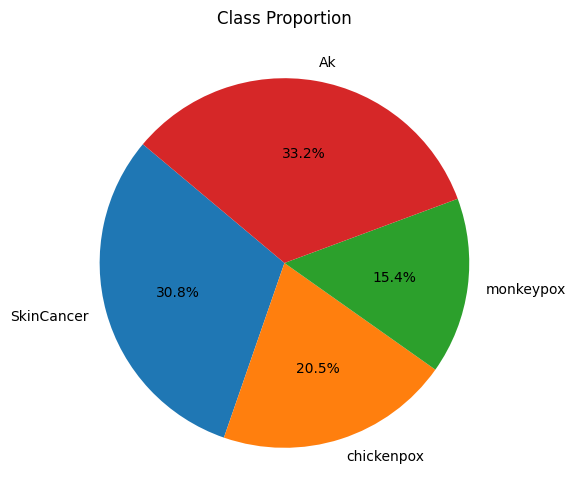

In [18]:
#Pie chart
plt.figure(figsize=(6,6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Class Proportion")
plt.show()


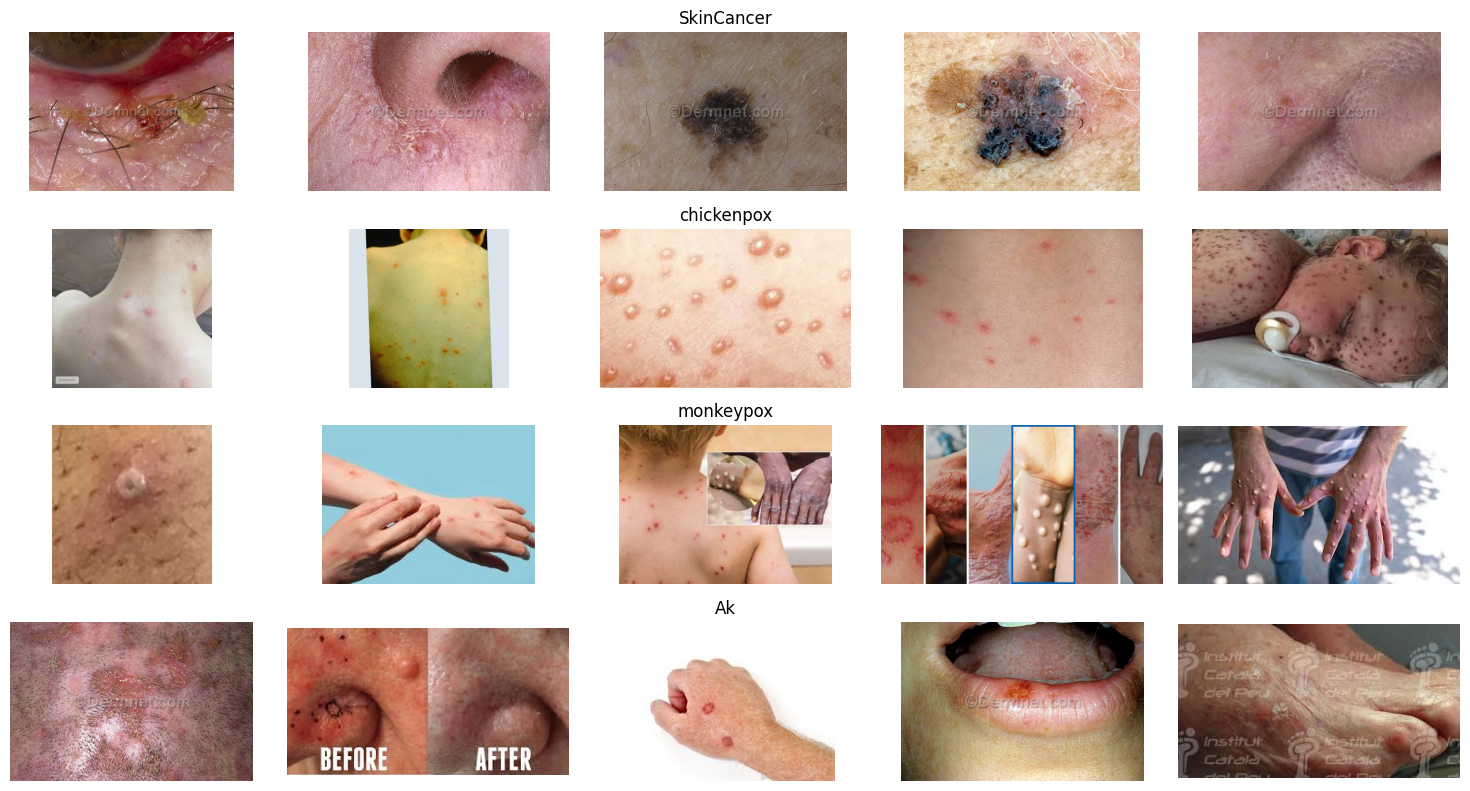

In [19]:
#Random Sample Grid per Class

#Display multiple random images per class in a grid
fig, axes = plt.subplots(len(CLASSES), 5, figsize=(15,8))

for i, cls in enumerate(CLASSES):
    class_path = os.path.join(DATASET_PATH, cls)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    samples = random.sample(images, 5)

    for j, img_name in enumerate(samples):
        img = Image.open(os.path.join(class_path, img_name))
        axes[i,j].imshow(img)
        axes[i,j].axis('off')
        if j == 2:  # show class label in middle image
            axes[i,j].set_title(cls)
plt.tight_layout()
plt.show()


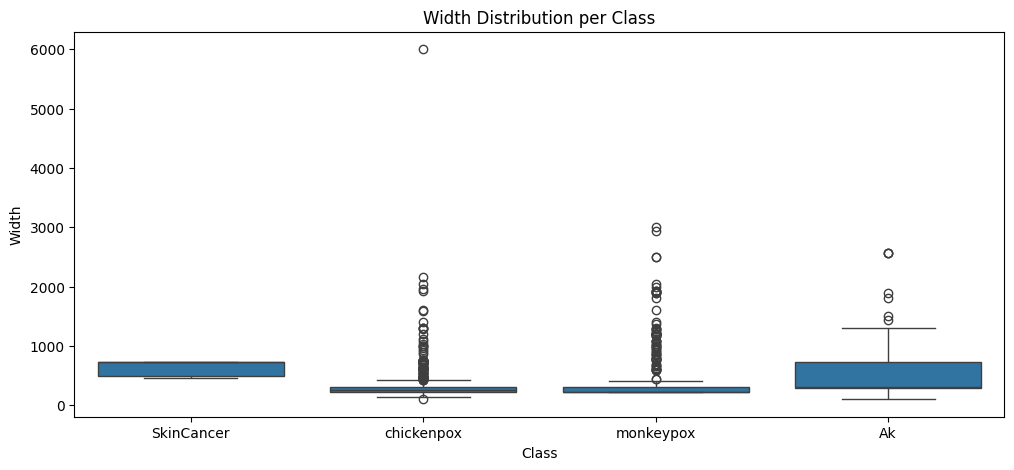

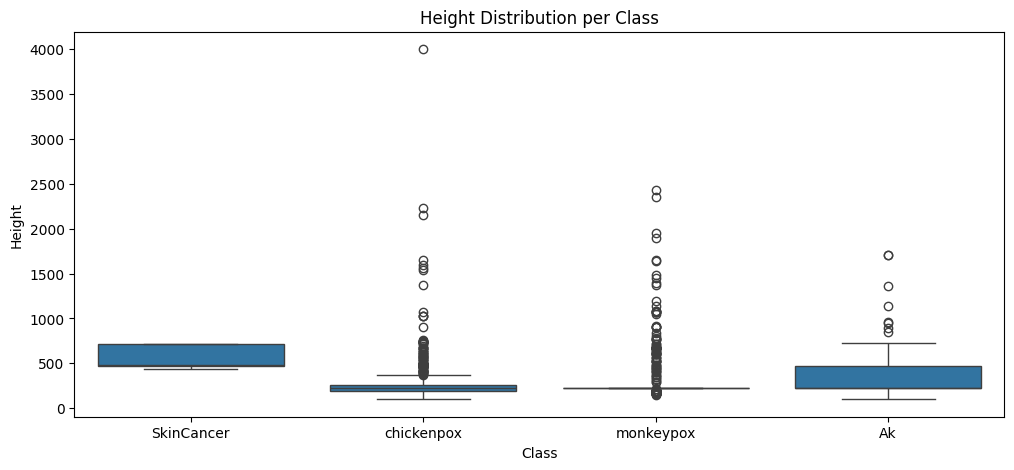

In [20]:
#Image Size Distribution per Class (Width & Height)
import seaborn as sns
import pandas as pd

size_data = []

for cls in CLASSES:
    class_path = os.path.join(DATASET_PATH, cls)
    for img_name in os.listdir(class_path):
        if img_name.lower().endswith(('.jpg','.png','.jpeg')):
            img = Image.open(os.path.join(class_path, img_name))
            w, h = img.size
            size_data.append([cls, w, h])

df_size = pd.DataFrame(size_data, columns=['Class','Width','Height'])

plt.figure(figsize=(12,5))
sns.boxplot(x='Class', y='Width', data=df_size)
plt.title("Width Distribution per Class")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='Class', y='Height', data=df_size)
plt.title("Height Distribution per Class")
plt.show()


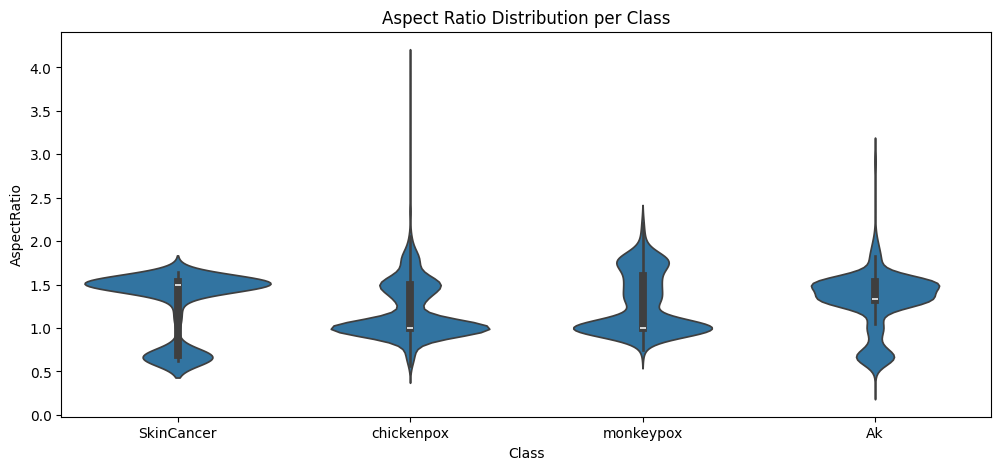

In [21]:
#Aspect Ratio Analysis
df_size['AspectRatio'] = df_size['Width'] / df_size['Height']

plt.figure(figsize=(12,5))
sns.violinplot(x='Class', y='AspectRatio', data=df_size)
plt.title("Aspect Ratio Distribution per Class")
plt.show()


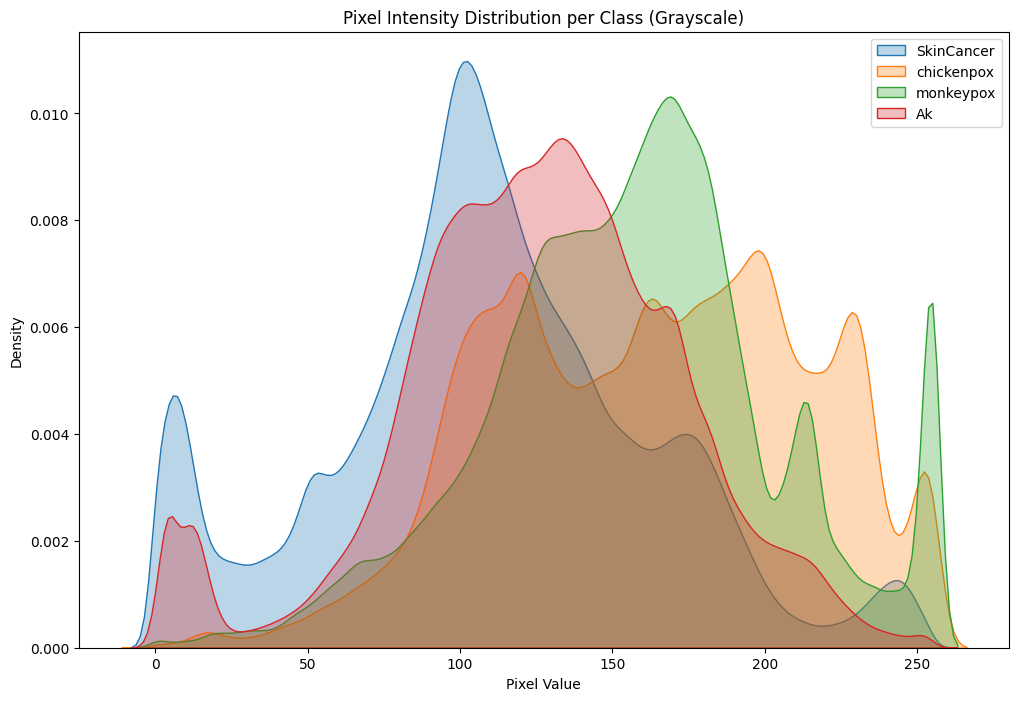

In [22]:
#Brightness/Pixel Intensity Distribution
plt.figure(figsize=(12,8))

for cls in CLASSES:
    class_path = os.path.join(DATASET_PATH, cls)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg','.png','.jpeg'))]
    sample_imgs = random.sample(images, min(10, len(images)))

    pixel_values = []
    for img_name in sample_imgs:
        img = cv2.imread(os.path.join(class_path, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        pixel_values.extend(img.flatten())

    sns.kdeplot(pixel_values, label=cls, fill=True, alpha=0.3)

plt.title("Pixel Intensity Distribution per Class (Grayscale)")
plt.xlabel("Pixel Value")
plt.ylabel("Density")
plt.legend()
plt.show()


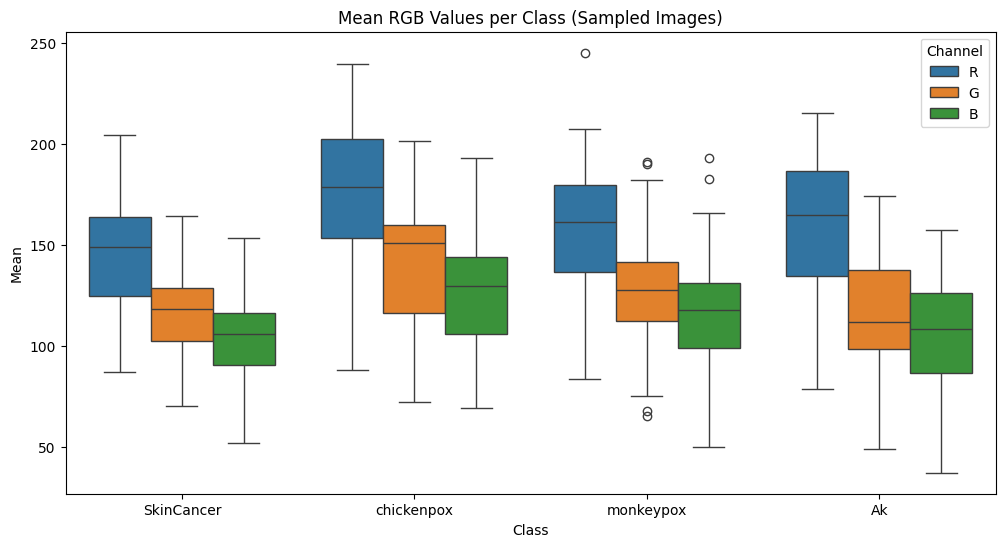

In [23]:
#Color Distribution (RGB)
color_means = []

for cls in CLASSES:
    class_path = os.path.join(DATASET_PATH, cls)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg','.png','.jpeg'))]
    sample_imgs = random.sample(images, min(50, len(images)))

    for img_name in sample_imgs:
        img = cv2.imread(os.path.join(class_path, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        r,g,b = img[:,:,0].mean(), img[:,:,1].mean(), img[:,:,2].mean()
        color_means.append([cls,r,g,b])

df_colors = pd.DataFrame(color_means, columns=['Class','R','G','B'])
df_colors_melt = df_colors.melt(id_vars='Class', value_vars=['R','G','B'], var_name='Channel', value_name='Mean')

plt.figure(figsize=(12,6))
sns.boxplot(x='Class', y='Mean', hue='Channel', data=df_colors_melt)
plt.title("Mean RGB Values per Class (Sampled Images)")
plt.show()
